# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

from sympy import symbols, diff

from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function
## $$ f(x) = x^2 + x + 1 $$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start = -3, stop = 3, num=100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

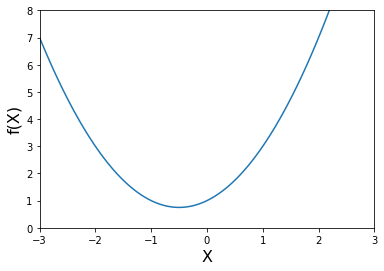

In [4]:
# Plot
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(X)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope and Derivitives

In [5]:
def df(x):
    return 2*x + 1

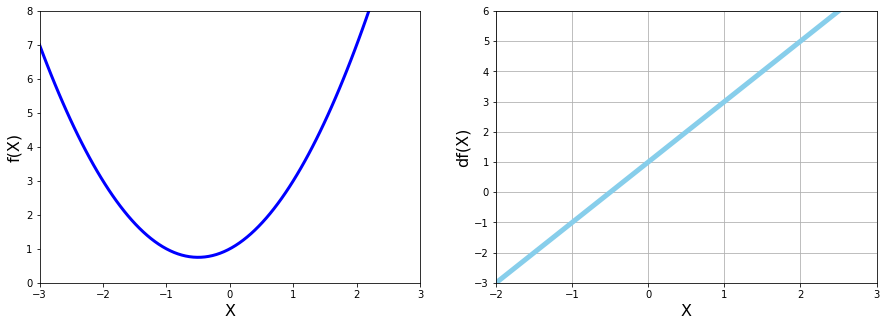

In [6]:
# Plot function and derivitive side by side
plt.figure(figsize=[15,5])

# 1 CHART: Cost function
plt.subplot(1,2,1)

plt.xlim(-3,3)
plt.ylim(0, 8)

plt.xlabel('X', fontsize=16)

plt.ylabel('f(X)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 CHART: Derivative
plt.subplot(1,2,2)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(X)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)



plt.show()

## Gradient Descent

In [7]:
## Gradient Descent

new_x = 3                  # Starting Point
previous_x = 0             # Temp value for loop
step_multiplier = 0.1      # Learning Rate
precision = 0.0001         # Desired Precision

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    step_size = abs(new_x - previous_x)
    if step_size < precision:
        print('Loop ran this many times: ', n)
        break
    
print('Local minimum occurs at:',new_x)
print('Slope or df(X) value at this point is', df(new_x))
print('f(X) value or cost at this point is', f(new_x))

Loop ran this many times:  40
Local minimum occurs at: -0.49962781616118024
Slope or df(X) value at this point is 0.0007443676776395236
f(X) value or cost at this point is 0.7500001385208099


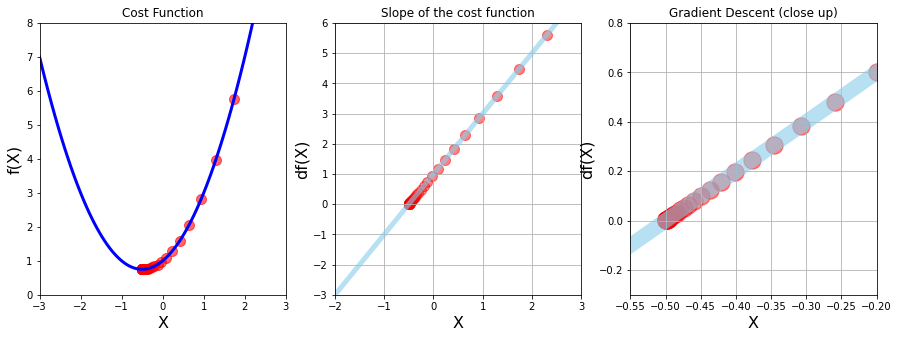

In [8]:
# Superimpose the Gradient Descent Calculations
plt.figure(figsize=[15,5])

# 1 CHART: Cost function
plt.subplot(1,3,1)

plt.xlim(-3,3)
plt.ylim(0, 8)

plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('f(X)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)
plt.scatter(x_list, f(np.array(x_list)), color='red', s=100, alpha=0.6)

# 2 CHART: Derivative
plt.subplot(1,3,2)

plt.xlim(-2,3)
plt.ylim(-3,6)

plt.grid()

plt.title('Slope of the cost function')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(X)', fontsize=16)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 CHART: Derivative (Close-Up)
plt.subplot(1,3,3)

plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)

plt.grid()

plt.title('Gradient Descent (close up)')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(X)', fontsize=16)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=15, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.5)

plt.show()

# Example 2 - Multiple Minima vs Initial Guess
## $$ g(x) = x^4 - 4x^2 + 5 $$

In [9]:
# Make some data
x_2 = np.linspace(-2,2,1000)

# Challenge: Write the g(x) function and the dg(x) function in python.

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

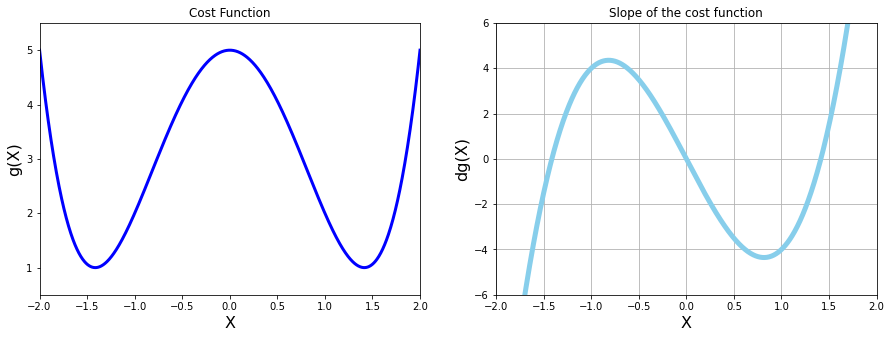

In [10]:
# Superimpose the Gradient Descent Calculations


plt.figure(figsize=[15,5])

# 1 CHART: Cost function
plt.subplot(1,2,1)

plt.xlim(-2,2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('g(X)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 CHART: Derivative
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,6)

plt.grid()

plt.title('Slope of the cost function')
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(X)', fontsize=16)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent as a Python Funciton

In [11]:
## Gradient Descent
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess                  # Starting Point
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        step_size = abs(new_x - previous_x)
        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [12]:
local_min, list_x, deriv_list = gradient_descent(
    derivative_func=dg, 
    initial_guess=-0.5, 
    multiplier=0.02, 
    precision=0.001
)
print('Local minima occurs at:', local_min)
print('Number of steps: ', len(list_x))

Local minima occurs at: -1.4122375085019094
Number of steps:  23


Local minima occurs at: 0.0
Number of steps:  2


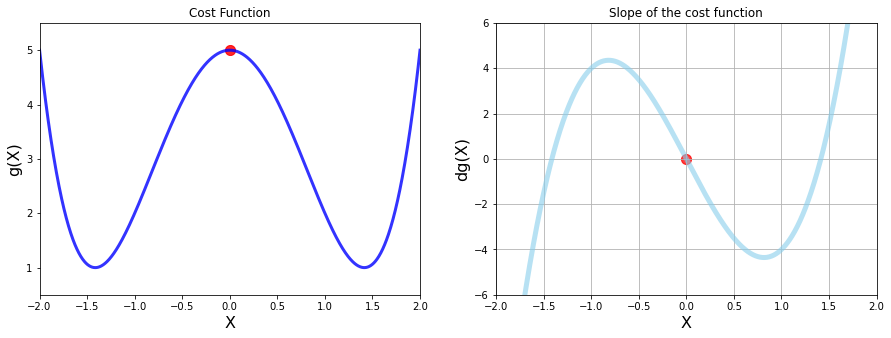

In [13]:
local_min, list_x, deriv_list = gradient_descent(
    derivative_func=dg, 
    initial_guess=0, 
)
print('Local minima occurs at:', local_min)
print('Number of steps: ', len(list_x))


plt.figure(figsize=[15,5])

# 1 CHART: Cost function
plt.subplot(1,2,1)

plt.xlim(-2,2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('g(X)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', alpha=0.6, s=100)

# 2 CHART: Derivative
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,6)

plt.grid()

plt.title('Slope of the cost function')
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(X)', fontsize=16)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence and Overflow
## $$ h(x) = x^5-2x^4+2$$

In [14]:
# Make Data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2
    
def dh(x):
    return 5*x**4 - 8*x**3

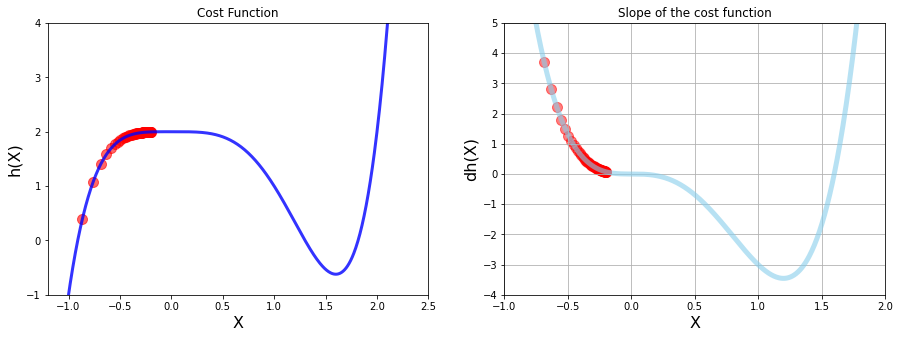

Local min occurs at: -1.8398461123332792e+24
Cost of minimum is:  -2.1081790694225687e+121
Number of Steps: 72


In [15]:
local_min, list_x, deriv_list = gradient_descent(
    derivative_func=dh, 
    initial_guess=-0.2,
    max_iter=71
)


plt.figure(figsize=[15,5])

# 1 CHART: Cost function
plt.subplot(1,2,1)

plt.xlim(-1.2,2.5)
plt.ylim(-1, 4)

plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('h(X)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', alpha=0.6, s=100)

# 2 CHART: Derivative
plt.subplot(1,2,2)

plt.xlim(-1,2)
plt.ylim(-4,5)

plt.grid()

plt.title('Slope of the cost function')
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(X)', fontsize=16)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at:', local_min)
print('Cost of minimum is: ', h(local_min))
print('Number of Steps:', len(list_x))

In [16]:
import sys
# help(sys)
sys.version
type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

# Python Tuples

In [17]:
# Creating a Tuple - Tuple Packing
breakfast = 'bacon', 'eggs', 'avodaco'
unlucky_numbers = 13,4,9,26,17

print('I looooove ', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')

not_my_adress = 1, 'Infinite Loop', 'Cupertino', 95015  # Tuples are heterogeneous
#breakfast[0] = 'Sausage' #Crashes                      # Tuples are immutable
tuple_with_single_value = 42,                           # Add a comma for single value tuple

data_tuple = gradient_descent(derivative_func = dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost of h is', h(data_tuple[0]))
print('Local min is', len(data_tuple[1]))



I looooove  bacon
My hotel has no 4th floor
Local min is 1.5989534547394717
Cost of h is -0.6214287992331258
Local min is 117


Local minima occurs at: 1.415879815113846
Number of steps:  14


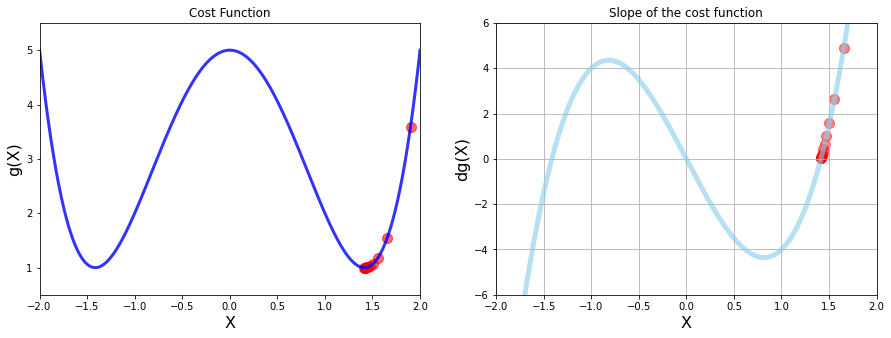

In [18]:
local_min, list_x, deriv_list = gradient_descent(
    derivative_func=dg, 
    initial_guess=1.9,
    multiplier=0.02,
    max_iter=500
)
print('Local minima occurs at:', local_min)
print('Number of steps: ', len(list_x))


plt.figure(figsize=[15,5])

# 1 CHART: Cost function
plt.subplot(1,2,1)

plt.xlim(-2,2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('g(X)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', alpha=0.6, s=100)

# 2 CHART: Derivative
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,6)

plt.grid()

plt.title('Slope of the cost function')
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(X)', fontsize=16)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# The Learning Rate

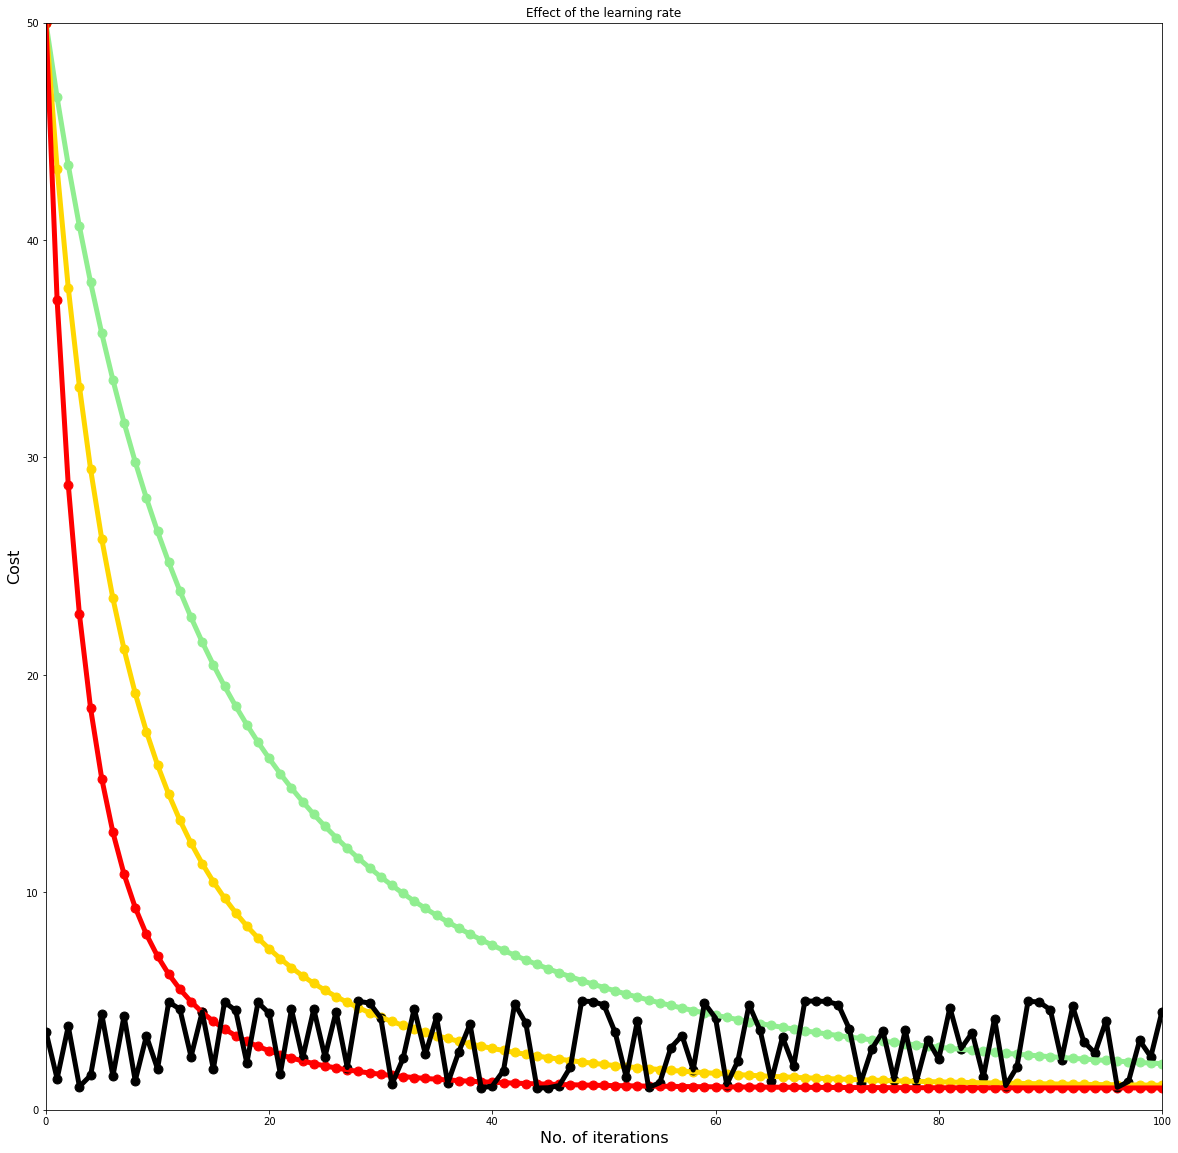

In [19]:
# Run Gradient Descent 3 times
# Challenge: Plot two more learning rates: mid_gamma (0.001) and create high_gamma(0.002)

n=100

low_gamma = gradient_descent(
    derivative_func=dg, 
    initial_guess=3,
    multiplier=0.0005,
    precision=0.0001,
    max_iter=n
)
mid_gamma = gradient_descent(
    derivative_func=dg, 
    initial_guess=3,
    multiplier=0.001,
    precision=0.0001,
    max_iter=n
)
high_gamma = gradient_descent(
    derivative_func=dg, 
    initial_guess=3,
    multiplier=0.002,
    precision=0.0001,
    max_iter=n
)

# EXPERIMENT
insane_gamma = gradient_descent(
    derivative_func=dg, 
    initial_guess=1.9,
    multiplier=0.25,
    precision=0.0001,
    max_iter=n
)

# Plotting reduction in cost for each iteration

plt.figure(figsize=[20,20])

plt.xlim(0,n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate')
plt.xlabel('No. of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)


# X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0,n+1))

# PLOTTING LEARNING RATES

# Low Values:
plt.plot(iteration_list, g(np.array(low_gamma[1])), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(np.array(low_gamma[1])), color='lightgreen', s=80 )

# Mid Values:
plt.plot(iteration_list,g(np.array(mid_gamma[1])), color='gold', linewidth=5)
plt.scatter(iteration_list,g(np.array(mid_gamma[1])), color='gold', s=80)

# High Values:
plt.plot(iteration_list,g(np.array(high_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list,g(np.array(high_gamma[1])), color='red', s=80)

# Insane Values:
plt.plot(iteration_list,g(np.array(insane_gamma[1])), color='black', linewidth=5)
plt.scatter(iteration_list,g(np.array(insane_gamma[1])), color='black', s=80)

_Our Algorithm is sensitive to initial guess and learning rate._

# Example 4 - Data Visualization with 3D Charts
## Minimize $$f(x,y) = \frac{1}{3^ {-x^2 -y^2} + 1}$$
Minimize $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}$

In [20]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [21]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array: ', x_4.shape)

x_4,y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid:', x_4.shape)
x_4

Shape of X array:  (200,)
Array after meshgrid: (200, 200)


array([[-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       ...,
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ]])

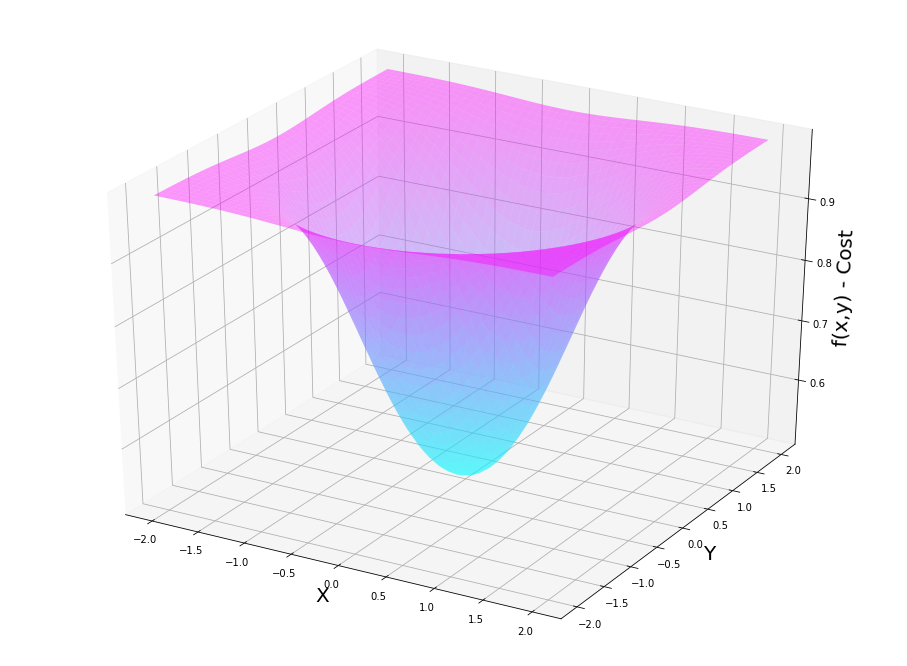

In [22]:
# Generating 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap=cm.cool, alpha=0.4)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)
plt.show()

# Partial Derivatives and Symbolic Computation
## $$\frac{\partial f}{\partial x} =  \frac{2x \ln(3) \cdot 3 ^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$    
## $$\frac{\partial f}{\partial y} =  \frac{2y \ln(3) \cdot 3 ^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

In [23]:
a, b = symbols('x, y')
print('Our cost function: ', f(a, b)) 
print('Partial Derivative wrt x is:',diff(f(a,b), a))

print('Value of f(x,y) at x=1.8 y=1.0 is',
      f(a, b).evalf(subs={a:1.8, b:1.0}))          # Python Dictionary

# Evaluate the value of the slope with respect to x at the same point (a=1.8, b=1.0)
print('Value of partial derivitive with respect to x: ', diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function:  1/(3**(-x**2 - y**2) + 1)
Partial Derivative wrt x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is 0.990604794032582
Value of partial derivitive with respect to x:  0.0368089716197505


# Batch Gradient Descent with SymPy

In [24]:
# Setup

multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])          # Initial Guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    # Create a variable named gradient_y and calculate the slope in the y direction
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of ',params[0])
print('Minimum occurs at y value of ',params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of  3.45838599885832e-11
Minimum occurs at y value of  1.92132555492129e-11
The cost is:  0.500000000000000


In [25]:
# Partial Derivitive Functions Example 4
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2
    
def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2

In [26]:
# Setup

multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])          # Initial Guess

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of ',params[0])
print('Minimum occurs at y value of ',params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of  3.458385998858304e-11
Minimum occurs at y value of  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [27]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])          # Initial Guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
#    values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of ',params[0])
print('Minimum occurs at y value of ',params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of  3.458385998858304e-11
Minimum occurs at y value of  1.9213255549212797e-11
The cost is:  0.5


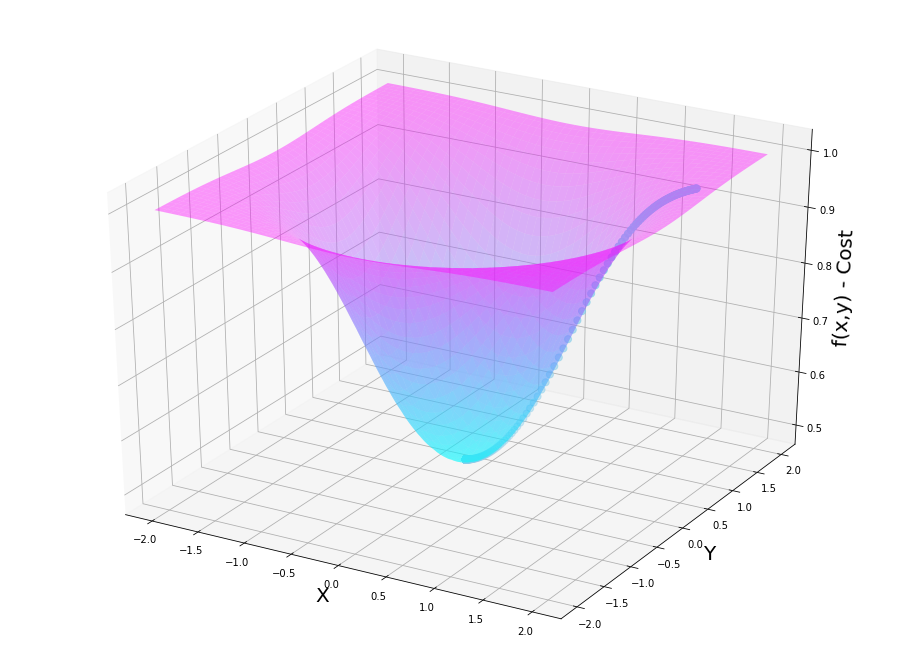

In [28]:
# Generating 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap=cm.cool, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='skyblue')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)
plt.show()

In [29]:
# Advanced Numpy Array Practice

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0] : ', hs_band[0])
print('hs_band[0][1] : ', hs_band[0][1])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
# Axis specifies whether to add as row or column.

print(the_roots)

print('Printing Nicknames...',
      the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print(the_roots)
print('Printing Band Roles...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0] :  ['Black Thought' 'MC']
hs_band[0][1] :  MC
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing Nicknames... ['Black Thought' 'Questlove' 'Captain']
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']
 ['Malik B' 'MC']]
Printing Band Roles... ['MC' 'Drums' 'Guitar' 'MC']


# Example 5: Working with Data and Real Cost Function
## Mean Squared Error: a cost function for regression problems
### $$ RSS = \sum_{i=1}^{n} \big( y^{(i)} -h_\theta x^{(i)} \big)^2 $$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} -h_\theta x^{(i)} \big)^2 $$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [30]:
# Make Sample Data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

print("Shape of x_5 array: ", x_5.shape)
print("Shape of y_5 array: ", y_5.shape)

Shape of x_5 array:  (7, 1)
Shape of y_5 array:  (7, 1)


In [31]:
#Quick Linear Regression
regr = LinearRegression()
regr.fit(x_5, y_5)

print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


[]

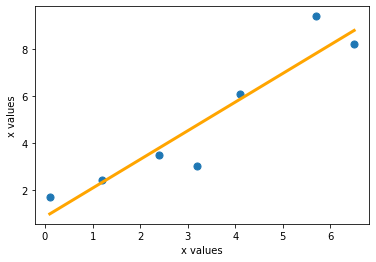

In [32]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('x values')
plt.plot()

In [33]:
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5
print('Est values y_hat are: \n', y_hat)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


In [34]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
#     assert y.size==y_hat.size
#     mse_calc 1/y.size * sum((y - y_hat)**2)
    mse_calc = np.average((y-y_hat)**2, axis=0)
    return mse_calc

In [35]:
print('Manually calculated MSE is: ', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is:  [0.94796558]
MSE regression using manual calc is 0.9479655759794577


## 3D Plot for the MSE Cost Function
### Make data for thetas

In [71]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [72]:
plot_cost = np.zeros((nr_thetas,nr_thetas))
for i in range(nr_thetas):
    for j in range(nr_thetas):
#         print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0: ', plot_t0.shape)
print('Shape of plot_t1: ', plot_t1.shape)
print('Shape of plot_cost: ', plot_cost.shape)

Shape of plot_t0:  (200, 200)
Shape of plot_t1:  (200, 200)
Shape of plot_cost:  (200, 200)


In [73]:
# Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'Value of i is {i} and j is {j}')



Value of i is 0 and j is 0
Value of i is 0 and j is 1
Value of i is 0 and j is 2
Value of i is 1 and j is 0
Value of i is 1 and j is 1
Value of i is 1 and j is 2
Value of i is 2 and j is 0
Value of i is 2 and j is 1
Value of i is 2 and j is 2


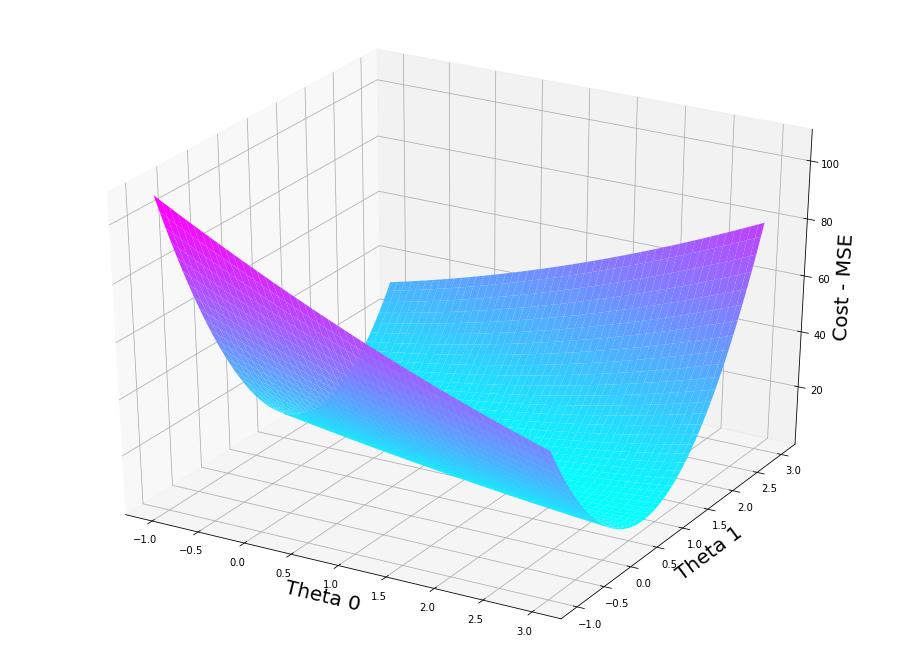

In [74]:
# Plotting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap='cool')
plt.show()

In [82]:
print('Min value of plot_cost: ', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost:  0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


<ipython-input-82-4150f983c341>:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)


$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y})^2 $$
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - (\theta_0 + \theta_1x)\big)^2 $$
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \theta_0 - \theta_1x\big)^2 $$
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \theta_0 - \theta_1x\big) \big( y - \theta_0 - \theta_1x\big) $$
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^2 - \theta_0y - \theta_1xy - \theta_0y + \theta_0^2 + \theta_0\theta_1x - \theta_1xy + \theta_0 \theta_1x + \theta_0^2x^2 \big)^2 $$
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^2 - 2 \theta_0y - 2 \theta_1xy + \theta_0^2 + 2 \theta_0\theta_1x - \theta_1^2x^2 \big)^2 $$

## Partial Derivatives of Mean Squared Error w.r.t. $\theta_0$ and $\theta_1$:

<hr>
<div>
With respect to $\theta_0$:
$$ \frac{\partial MSE}{\partial \theta_0} = \frac{1}{n} \sum_{i=1}^{n} \big(-2y + 2 \theta_0 + 2 \theta_1 x \big)$$
$$ \frac{\partial MSE}{\partial \theta_0} = \frac{1}{n} \sum_{i=1}^{n} \big( -2 \big)\big(y - \theta_0 - \theta_1 x \big)$$
$$ \frac{\partial MSE}{\partial \theta_0} = \frac{-2}{n} \sum_{i=1}^{n} \big(y - \theta_0 - \theta_1 x \big)$$
$$ \frac{\partial MSE}{\partial \theta_0} = \frac{-2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

And With respect to $\theta_1$:
$$ \frac{\partial MSE}{\partial \theta_1} = \frac{1}{n} \sum_{i=1}^{n} \big(-2xy + 2 \theta_0 x + 2 \theta_1 x^2 \big)$$
$$ \frac{\partial MSE}{\partial \theta_1} = \frac{1}{n} \sum_{i=1}^{n} \big( -2 \big)\big(xy - \theta_0 x - \theta_1 x^2 \big)$$
$$ \frac{\partial MSE}{\partial \theta_1} = \frac{-2}{n} \sum_{i=1}^{n} \big(y - \theta_0 - \theta_1 x \big)\big( x \big)$$
$$ \frac{\partial MSE}{\partial \theta_1} = \frac{-2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)\big( x^{(i)} \big)$$
</div>
<hr>

## $$ \frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$
## $$ \frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)\big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [91]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x,y,thetas):
    n = y.size
    
    # Challenge: Create theta_0 slope and theta1_slope to hold slope values from partial derivaives
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
#     return np.array([theta0_slope[0], theta1_slope[1]])
#     return np.append(arr=theta0_slope, values=theta1_slope)\
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [93]:
multiplier = 0.01
thetas = np.array([2.9,2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1] * x_5))
    
# Results
print('Min occurs at Theta 0: ', thetas[0])
print('Min occurs at Theta 1: ', thetas[1])
print('MSE: ', mse(y_5, thetas[0] + thetas[1] * x_5))

Min occurs at Theta 0:  0.8532230461743415
Min occurs at Theta 1:  1.2214935332607393
MSE:  [0.94797511]


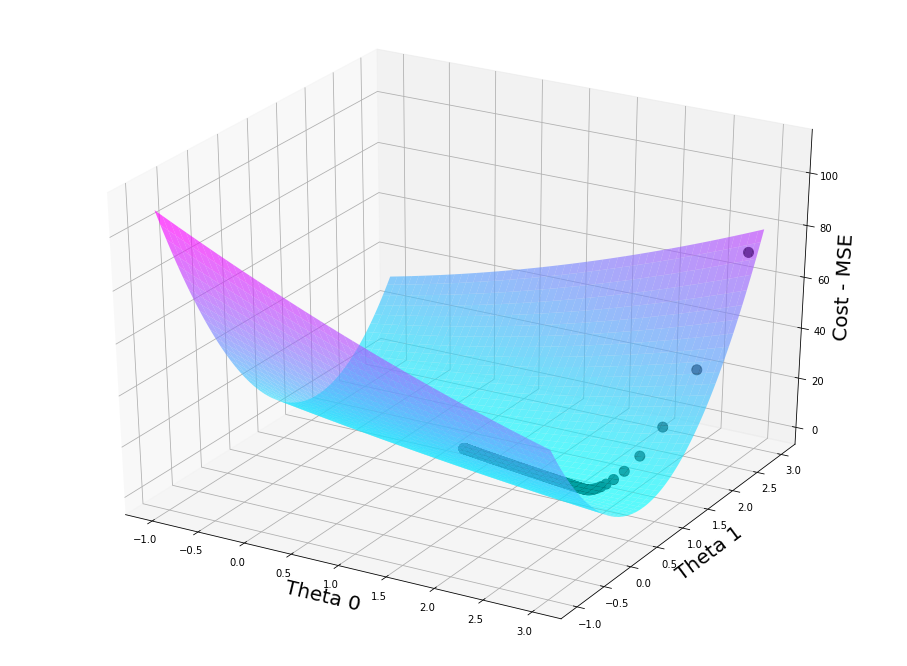

In [103]:
# Plotting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:,0], plot_vals[:,1], mse_vals, s=100, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.cool, alpha=0.64)
plt.show()